In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
data = pd.read_csv('C:/Users/varunn/Documents/Confluence attachments/Placeholder job analysis/MachinelearningSweetspot.csv')


In [108]:

data.Client.unique()


array(['Magnum', 'Texas Beef Council', 'Rexona', 'McCormick & Co., Inc.',
       'Nike Digital Commerce', 'Nike Digital Brand',
       'Google Australia Pty Ltd.', 'Royal Caribbean',
       'Samsung US (Branding & Advertising)', 'Google Embedded', "L'Oreal",
       'Western Digital Technologies, Inc.', 'Nike Innovation', 'Novartis',
       'Verizon', 'Equinox', 'J&J (Corporate)', 'Nike Global Sales',
       'J&J (Vision Care)', 'Natl Cattlemens Beef Assoc', 'AARP',
       'McDonalds Europe Ltd', 'Strauss Romania S.R.L.',
       'Jewelers Mutual Insurance Company', 'Google US', 'Google for Work',
       'E*Trade', 'Beats By Dre (HUSTLE)', 'Samsung US (XD & Systems)',
       'Naturals', 'Pozitif Muzik A.S.', 'Nokia Global', 'Vizient',
       'YouTube', 'Hus_B', 'Big Heart Pet Brands',
       'Macquarie Group Services', 'TIM Cellular', 'Fossil Wearables',
       'Google APAC', 'Telstra', 'TD Bank, NA', 'Tiffany & Co.',
       'Samsung Global (Mobile)', 'DBS Bank Ltd',
       'Coca-Cola Am

In [137]:
data[data.Client=='Google Brazil']

,JobID,CLientID,Client,SOW Value in Finance Esle Budget,retainerID,SOWstatus,ProjectCancelled,EmpHeadcount,TBDHeadcount,Total Headcount,Total Burn,1 is cost less than revenue
306,44414,1001,Google Brazil,180660.0,0,Signed,Not,13,6,19,122086.75,1
340,44494,1001,Google Brazil,200140.0,0,Signed,Not,20,4,24,207793.75,0
343,44533,1001,Google Brazil,276030.0,0,Signed,Not,18,4,22,275977.75,1
457,44850,1001,Google Brazil,145862.0,0,Signed,Not,21,7,28,145744.75,1
468,44880,1001,Google Brazil,9744.0,0,Signed,Not,11,0,11,9744.00,0
891,45736,1001,Google Brazil,670322.0,0,Signed,Not,28,14,42,525004.25,1
892,45737,1001,Google Brazil,906870.0,0,Signed,Not,40,11,51,787545.25,1
1560,47145,1001,Google Brazil,155972.0,0,Signed,Not,18,8,26,64596.00,1
1598,48239,1001,Google Brazil,77284.0,0,Signed,Not,10,4,14,25245.00,1
1880,48830,1001,Google Brazil,15379.0,0,Signed,Not,4,3,7,13433.00,1


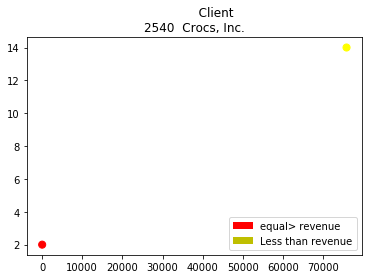

In [141]:
import copy
c = copy.deepcopy(data)
cname = 'Crocs, Inc.'
c1 =c[c.Client==cname]
title = c1[c1.Client==cname][:1][[2]]
X = c1[['SOW Value in Finance Esle Budget','EmpHeadcount']]
y= c1['1 is cost less than revenue']

recs = []
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y,s=50, cmap='autumn')
classes = ['equal> revenue','Less than revenue']
plt.legend(recs,classes,loc=4)
class_colours = ['r','y']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)
plt.title(title)
plt.show()

In [32]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    
    #xx,yy = np.meshgrid(np.arange(10).astype(np.int8),np.arange(10).astype(np.int8),
    #        sparse=True, copy=False)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h).astype(np.int8),
                         np.arange(y_min, y_max, h).astype(np.int8),sparse=True,copy=False)
    return xx, yy

def plot_contours(ax, clf, xx, yy):
    """
    plot_contours(ax, clf, xx, yy, **params):
    Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z)
    #out = ax.contourf(xx, yy, Z, **params)
    return out

# import some data to play with
iris = data[data.CLientID==130]
# Take the first two features. We could avoid this by using a two-dim dataset
X = [[1,3],[2,1],[3,3],[2,2]]
y = [0,1]

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C))
          #,
          #svm.SVC(kernel='rbf', gamma=0.7, C=C),
          #svm.SVC(kernel='poly', degree=3, C=C))

          
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)'
          )



#('SVC with linear kernel',
#          'LinearSVC (linear kernel)',
#          'SVC with RBF kernel',
#          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy)
                  #cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, s=20, edgecolors='k')
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #ax.set_xlim(xx.min(), xx.max())
    #ax.set_ylim(yy.min(), yy.max())
    #ax.set_xlabel('Sepal length')
    #ax.set_ylabel('Sepal width')
    #ax.set_xticks(())
    #ax.set_yticks(())
    #ax.set_title(title)

plt.show()


Automatically created module for IPython interactive environment


TypeError: list indices must be integers, not tuple